In [25]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

## Data Preparation & Harmonization

In [5]:
path_data_france_fts = os.path.join('..', 'data', 'outdated', 'france_cities_0_200_fts.csv')
path_data_france_attr = os.path.join('..', 'data', 'outdated', 'france-gov_attrib.csv')
data_france_fts = pd.read_csv(path_data_france_fts)
data_france_attr = pd.read_csv(path_data_france_attr)

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.


In [47]:
path_data_netherlands_fts = os.path.join('..', 'data', 'outdated', 'netherlands_cities_0_200_fts.csv')
path_data_netherlands_attr = os.path.join('..', 'data', 'outdated', 'netherlands-gov_attrib.csv')
data_netherlands_fts = pd.read_csv(path_data_netherlands_fts)
data_netherlands_attr = pd.read_csv(path_data_netherlands_attr)

In [97]:
data_netherlands_fts = data_netherlands_fts.drop_duplicates(subset=['id'])
data_netherlands_attr = data_netherlands_attr.drop_duplicates(subset=['id'])

In [6]:
data_france_fts = data_france_fts.drop_duplicates(subset=['id'])
data_france_attr = data_france_attr.drop_duplicates(subset=['id'])

In [7]:
data_france_attr['age'] = data_france_attr['age'].str[:4].astype(float)

In [8]:
data_netherlands = pd.concat([data_netherlands_fts.set_index('id'), data_netherlands_attr.set_index('id')], axis=1, join="inner").reset_index()
data_france = pd.concat([data_france_fts.set_index('id'), data_france_attr.set_index('id')], axis=1, join="inner").reset_index()

In [9]:
data_france.to_csv('france-cities-200.csv', encoding='utf-8', index=False)
data_netherlands.to_csv('netherlands-cities-200.csv', encoding='utf-8', index=False)

## Data

In [14]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

In [ ]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1)

In [141]:
path_data_france_few_features = os.path.join('..', 'data', 'all_age.csv')
old_columns = pd.read_csv(path_data_france_few_features).columns
france_few_features = list(set(old_columns) - set(dataset.AUX_VARS) - set(dataset.OTHER_ATTRIBUTES) - set([dataset.AGE_ATTRIBUTE])) + ['age']

data_france_baseline_few_features = data_france[france_few_features]
data_france_baseline_few_features_sample = data_france_baseline_few_features.sample(frac=.1)


## Experiments with all features

In [84]:
print(data_netherlands_sample.select_dtypes('object').columns.to_list())

['city', 'source_file']


In [105]:
print(data_france_sample.dtypes)
print(data_france_sample.select_dtypes('object').columns.to_list())


['id', 'TouchesIndexes', 'city', 'type_source', 'age', 'source_file']


### France

2022-01-17 21:07:43,466 | INFO : Dataset length: 86128
2022-01-17 21:07:43,542 | INFO : Test dataset length: 17226
2022-01-17 21:07:43,543 | INFO : Training dataset length: 68902
2022-01-17 21:07:43,544 | INFO : Standard deviation of test set: 80.99794120541318
2022-01-17 21:07:43,737 | INFO : Test dataset length after preprocessing: 11650
2022-01-17 21:07:43,738 | INFO : Training dataset length after preprocessing: 46797
2022-01-17 21:07:43,739 | INFO : Standard deviation of test set after preprocessing: 26.263543538624468


MAE: 16.558742602434283 y
RMSE: 22.06079608742445 y
R2: 0.29437656285939695


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


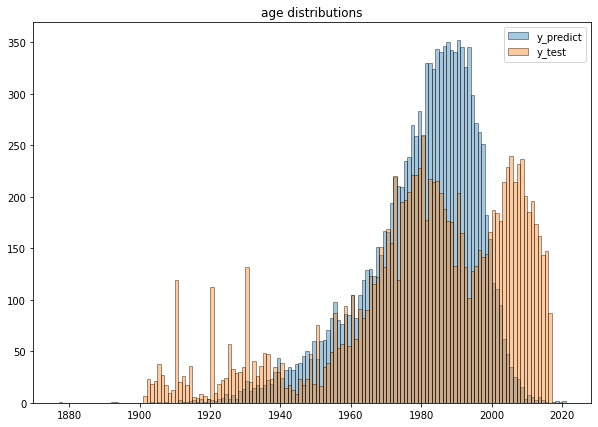

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

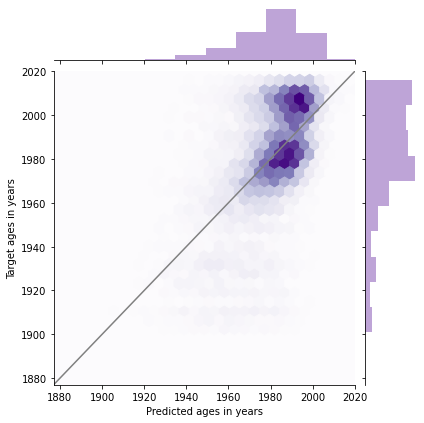

invalid value encountered in true_divide


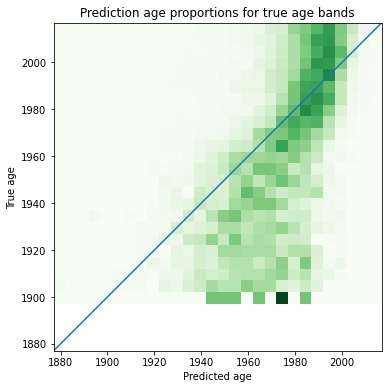

In [188]:
predictor_france_sample = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_france_sample.evaluate_regression()

MAE: 15.824016642398407 y
RMSE: 21.298638423546844 y
R2: 0.3557424761383655


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


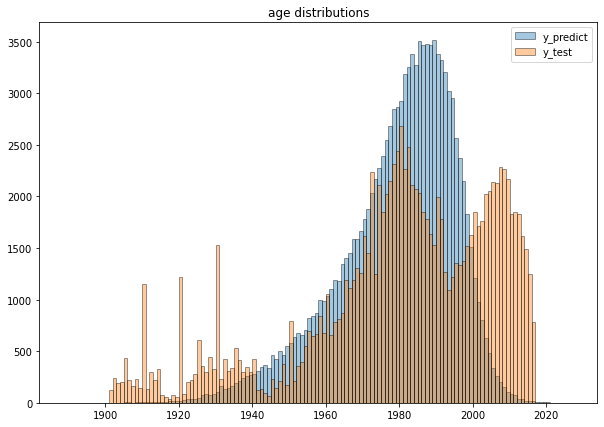

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

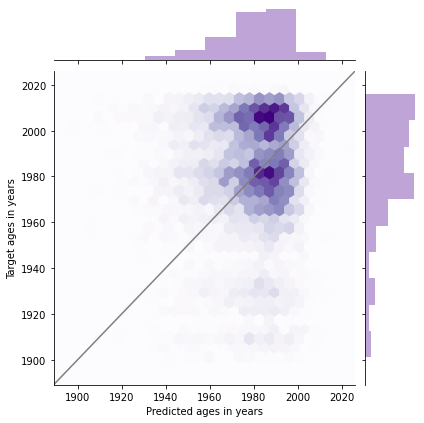

In [131]:
predictor_france = AgePredictor(
    model=XGBRegressor(),
    df=data_france,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_france.evaluate_regression()

MAE: 17.16334456799412 y
RMSE: 22.90508068078157 y
R2: 0.23679350599153737


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


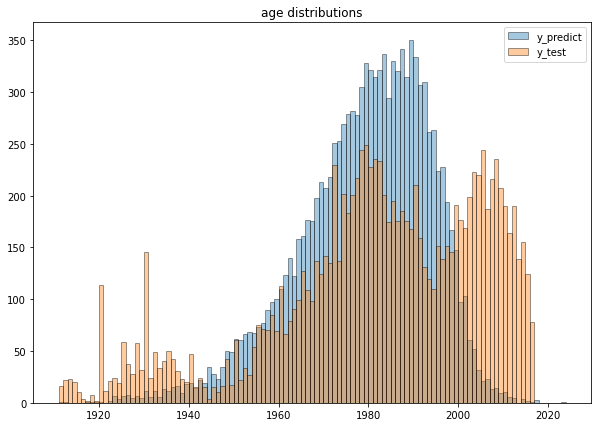

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

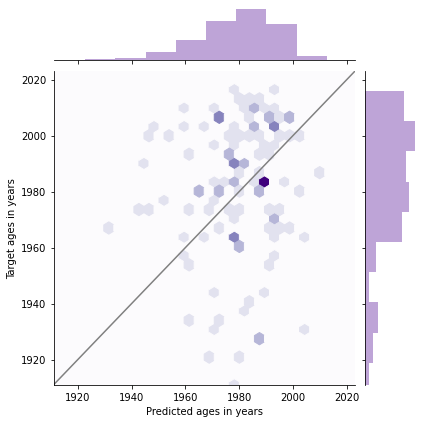

In [144]:
predictor_france = AgePredictor(
    model=XGBRegressor(),
    df=data_france_baseline_few_features_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_france.evaluate_regression()

### Netherlands

2022-01-17 17:43:33,237 | INFO : Dataset length: 147536
2022-01-17 17:43:33,453 | INFO : Test dataset length: 29508
2022-01-17 17:43:33,454 | INFO : Training dataset length: 118028
2022-01-17 17:43:33,457 | INFO : Standard deviation of test set: 32.697200083131364
2022-01-17 17:43:33,851 | INFO : Test dataset length after preprocessing: 28667
2022-01-17 17:43:33,852 | INFO : Training dataset length after preprocessing: 114709
2022-01-17 17:43:33,853 | INFO : Standard deviation of test set after preprocessing: 24.888311827064552


MAE: 13.076993438393885 y
RMSE: 18.68743340373386 y
R2: 0.43620192723718665


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


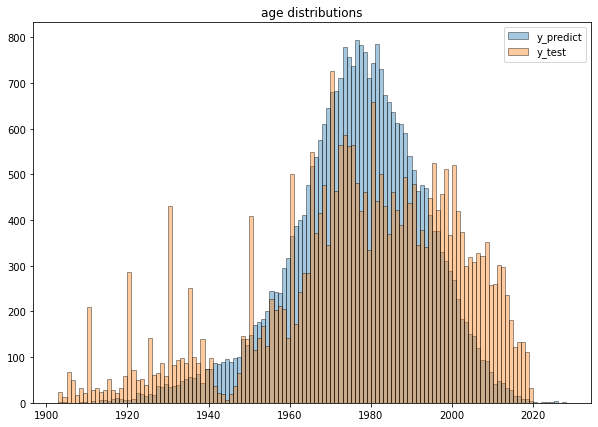

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

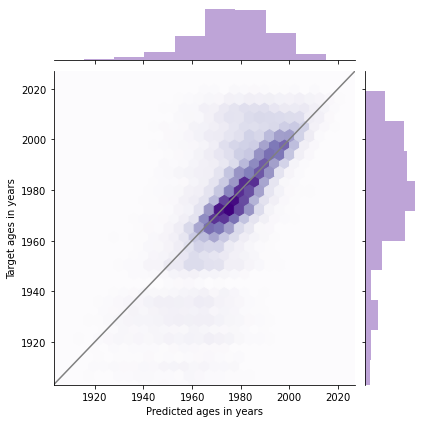

invalid value encountered in true_divide


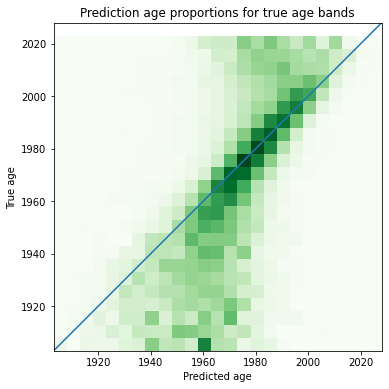

In [171]:
predictor_netherlands = AgePredictor(
    model=XGBRegressor(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_netherlands.evaluate_regression()

In [93]:
predictor = AgePredictor(
    model=XGBRegressor(),
    df=data_netherlands,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)

MAE: 12.320109902292122 y
RMSE: 17.906553414966623 y
R2: 0.47748675080857717


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


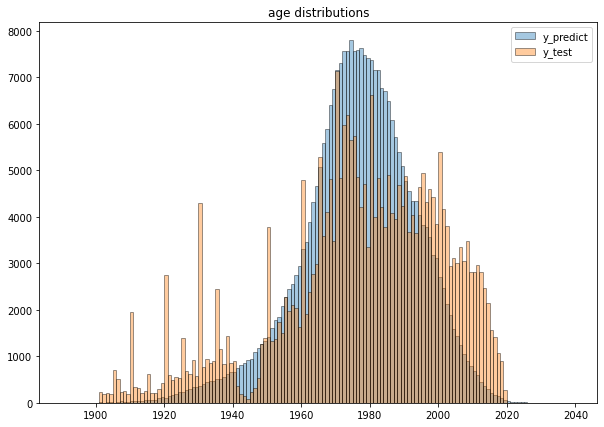

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

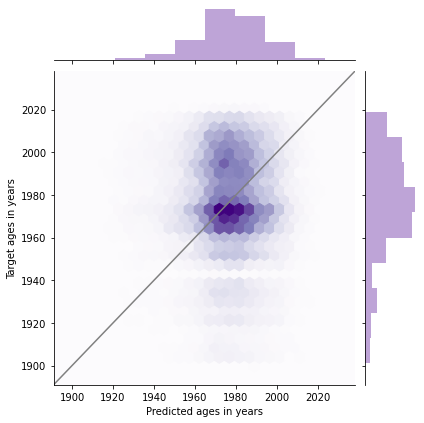

In [94]:
predictor.evaluate_regression()

### Homogeneous regions (i.e. medium-sized cities with old center)

In [224]:
df = data_france.copy()
# df = filter_french_medium_sized_cities_with_old_center(df)
cities = sorted(df['city'].unique())
df_test = df.loc[df['city'] == cities[dataset.GLOBAL_REPRODUCIBILITY_SEED % len(cities)]]
df_train = df.loc[~df.index.isin(df_test.index)]
df_train.info()

# print(len(df))
# print(len(df_test) + len(df_train))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097175 entries, 0 to 2097740
Columns: 128 entries, id to source_file
dtypes: float64(109), int64(14), object(5)
memory usage: 2.0+ GB


2022-01-17 14:01:48,320 | INFO : Dataset length: 2097741
2022-01-17 14:01:48,666 | INFO : Test dataset length: 12199
2022-01-17 14:01:48,666 | INFO : Training dataset length: 122798
2022-01-17 14:01:48,667 | INFO : Standard deviation of test set: 59.61299007131891
2022-01-17 14:01:48,966 | INFO : Test dataset length after preprocessing: 5899
2022-01-17 14:01:48,966 | INFO : Training dataset length after preprocessing: 50106


MAE: 15.588285020335809 y
RMSE: 20.869654794580264 y
R2: 0.19195409431536103


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


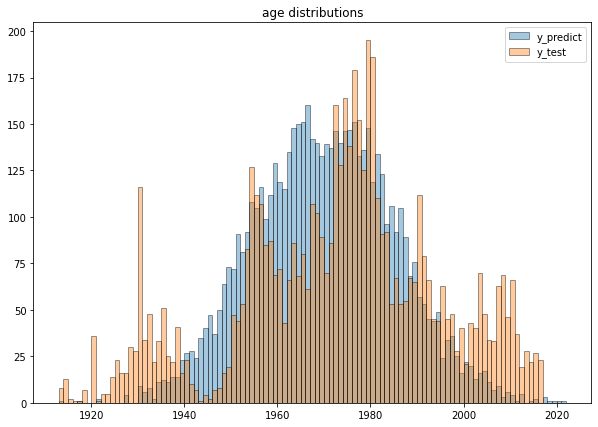

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

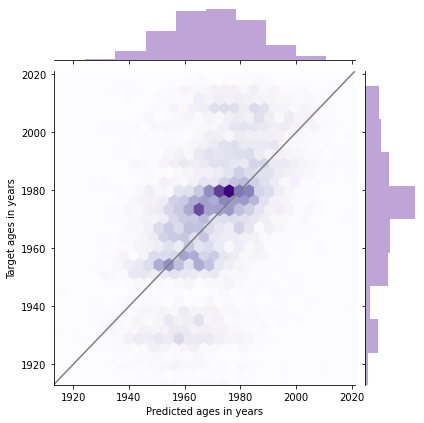

In [16]:
predictor_medium_cities = AgePredictor(
    model=XGBRegressor(),
    df=data_france,
    test_training_split=split_and_filter_by_french_medium_sized_cities_with_old_center,
    preprocessing_stages=[remove_outliers]
)
predictor_medium_cities.evaluate_regression()

2022-01-17 14:13:35,360 | INFO : Dataset length: 209774
2022-01-17 14:13:35,574 | INFO : Test dataset length: 41955
2022-01-17 14:13:35,575 | INFO : Training dataset length: 167819
2022-01-17 14:13:35,577 | INFO : Standard deviation of test set: 81.10089311577134
2022-01-17 14:13:35,771 | INFO : Test dataset length after preprocessing: 11628
2022-01-17 14:13:35,771 | INFO : Training dataset length after preprocessing: 46819
2022-01-17 14:13:35,772 | INFO : Standard deviation of test set after preprocessing: 26.30139992181761


MAE: 16.56107389373307 y
RMSE: 22.141990963800477 y
R2: 0.29121754406833844


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


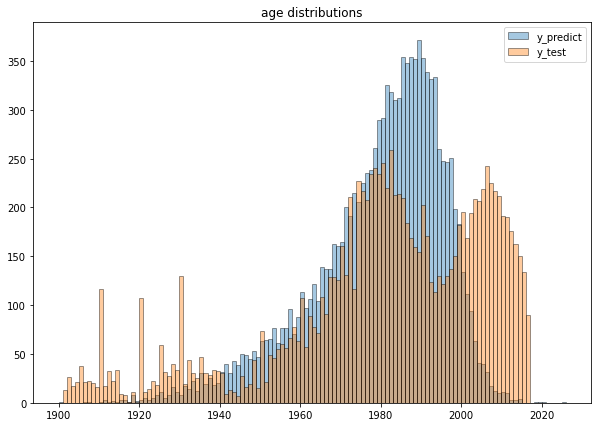

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

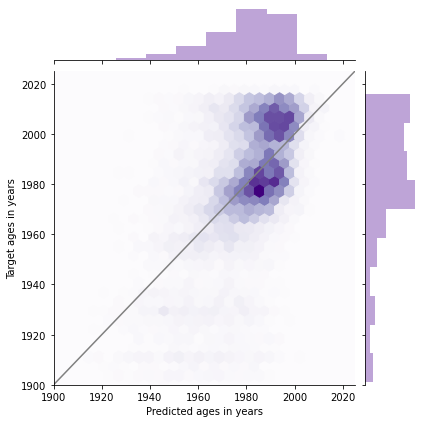

In [19]:
predictor_medium_cities = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_medium_cities.evaluate_regression()

2022-01-17 17:00:40,683 | INFO : Dataset length: 2097741
2022-01-17 17:00:46,379 | INFO : Test dataset length: 419549
2022-01-17 17:00:46,380 | INFO : Training dataset length: 1678192
2022-01-17 17:00:46,385 | INFO : Standard deviation of test set: 81.1388946764225
2022-01-17 17:00:48,354 | INFO : Test dataset length after preprocessing: 11205
2022-01-17 17:00:48,355 | INFO : Training dataset length after preprocessing: 44800
2022-01-17 17:00:48,356 | INFO : Standard deviation of test set after preprocessing: 29.04343816346026


MAE: 14.874944515475095 y
RMSE: 20.522015756822366 y
R2: 0.5006756556361962


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


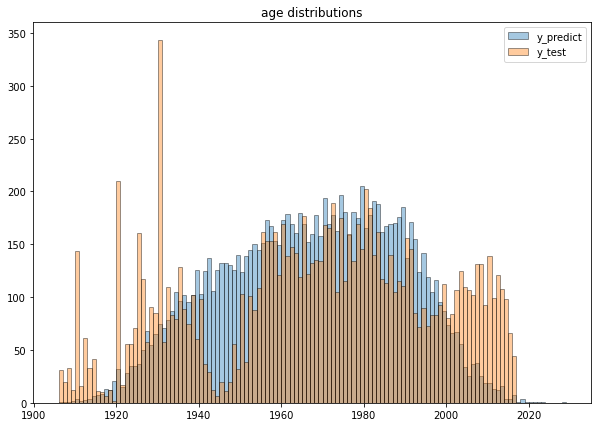

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

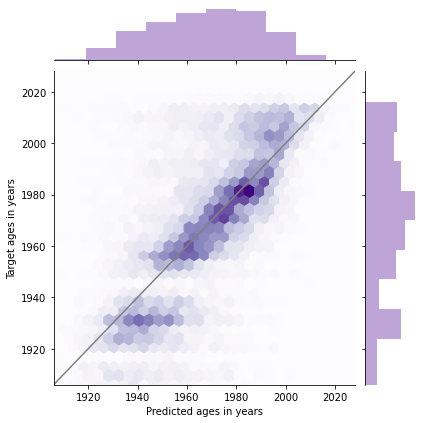

invalid value encountered in true_divide


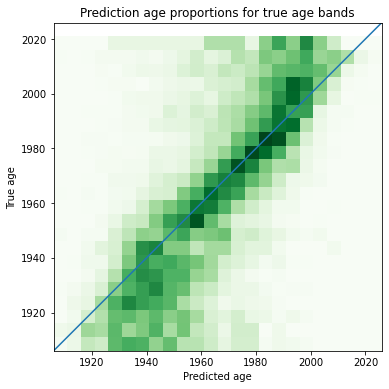

In [166]:
predictor_medium_cities = AgePredictor(
    model=XGBRegressor(),
    df=data_france,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, filter_french_medium_sized_cities_with_old_center]
)
predictor_medium_cities.evaluate_regression()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will

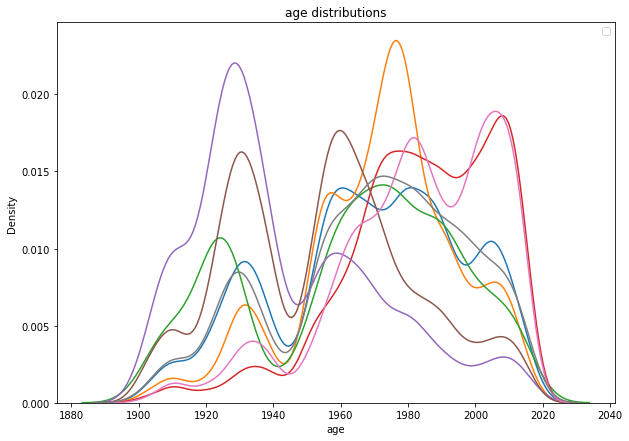

In [20]:
import utils
df = data_france.copy()
df = remove_outliers(df)
city_age_distribution = {}

city_names = ['Valence', 'Aurillac', 'Oyonnax', 'Aubenas', 'Vichy', 'Montluçon', 'Montélimar', 'Bourg-en-Bresse']
for city in city_names:
    city_age_distribution[city] = df.loc[df['city'] == city][dataset.AGE_ATTRIBUTE]

visualizations.plot_distribution(city_age_distribution)

# import seaborn as sns
# import matplotlib.pyplot as plt

# df_filtered = df[df['city'].isin(city_names)]

# p = sns.displot(data=df_filtered, x='age', stat='percent', hue='city', binwidth=5,height=10)
# plt.show()

### Relative grid plot

invalid value encountered in true_divide


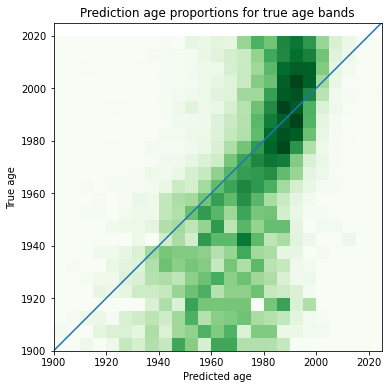

In [165]:
visualizations.plot_relative_grid(predictor_france_sample.y_test, predictor_france_sample.y_predict)

#### Dummy example to validate plot_relative_grid()

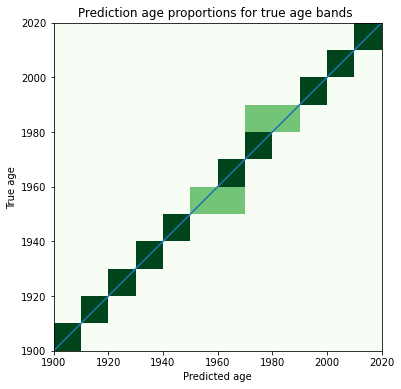

In [164]:
import matplotlib.pyplot as plt

bins = utils.age_bins(predictor_france_sample.y_predict, bin_size=10)
# x = predictor_france_sample.y_test[dataset.AGE_ATTRIBUTE]
# y = predictor_france_sample.y_predict[dataset.AGE_ATTRIBUTE]
x = [1900,1910,1920,1930,1940,1950,1950,1960,1970,1980,1980,1980,1980,1990,2000,2010]
y = [1900,1910,1920,1930,1940,1950,1960,1960,1970,1970,1970,1980,1980,1990,2000,2010]
H = np.histogram2d(x, y, bins=bins)[0]
H_norm = (H.T / H.sum(axis=1)).T
X, Y = np.meshgrid(bins, bins)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(132, title='Prediction age proportions for true age bands ', aspect='equal')
ax.set_xlabel('Predicted age')
ax.set_ylabel('True age')
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.pcolormesh(X, Y, H_norm, cmap='Greens')

In [161]:
pd.DataFrame(H.sum(axis=0)) # sum of all prediction data
pd.DataFrame(H.sum(axis=1)) # sum of all test data
pd.DataFrame((H.T / H.sum(axis=1)).T) # relative share of all prediction age bands for buildings of a certain test age band (periods with more buildings will not be brighter than periods with little buildings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.005155,0.020619,0.067010,0.097938,0.139175,0.175258,0.231959,0.128866,0.113402,0.015464,0.005155,0.000000
1,0.003953,0.027668,0.035573,0.094862,0.118577,0.189723,0.185771,0.166008,0.130435,0.043478,0.003953,0.000000
2,0.000000,0.019231,0.041209,0.096154,0.129121,0.208791,0.184066,0.186813,0.101648,0.032967,0.000000,0.000000
3,0.002375,0.004751,0.042755,0.102138,0.192399,0.187648,0.149644,0.190024,0.104513,0.021378,0.002375,0.000000
4,0.000000,0.000000,0.015625,0.031250,0.130208,0.156250,0.208333,0.229167,0.182292,0.031250,0.010417,0.005208
5,0.000000,0.005291,0.005291,0.028219,0.119929,0.206349,0.223986,0.248677,0.130511,0.029982,0.001764,0.000000
6,0.000000,0.001015,0.005076,0.014213,0.044670,0.099492,0.218274,0.286294,0.233503,0.085279,0.012183,0.000000
7,0.000000,0.000000,0.001010,0.006566,0.014141,0.039899,0.121212,0.261111,0.361616,0.176263,0.018182,0.000000
8,0.000000,0.000000,0.001479,0.002465,0.013807,0.027120,0.082347,0.175542,0.363412,0.305720,0.027120,0.000986
9,0.000000,0.000000,0.001371,0.002056,0.014393,0.033585,0.058259,0.160384,0.340644,0.329678,0.056888,0.002742


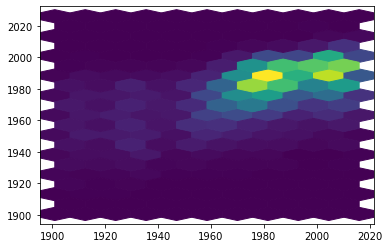

In [71]:
plt.subplot(111)
plt.hexbin(x, y, gridsize=(10,10),
        #    C=np.ones_like(y, dtype=np.float) / hb.get_array().max(),
        #    cmap=plt.cm.YlOrRd_r,
           reduce_C_function=np.sum)